In [1]:
# Spark
import pyspark
# from pyspark import SparkConf,SparkContext
# try:
#     sc.stop()
# except:
#     pass
# conf = SparkConf().setMaster('local[2]').setAppName('MyApp')
# sc = SparkContext(conf=conf).getOrCreate()
# # Visaulization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [3]:
# 原始读取数据方法
data = sc.textFile('/Users/dzzxjl/data/NYC/train.csv')
data.take(5)

In [13]:
# 因为数据组织呈结构化，将数据读取成DataFrame
df = spark.read.format("csv").option("header","true").csv('/Users/dzzxjl/data/NYC/train.csv')

In [84]:
# 显示top5数据
# 仅以视图形式返回
df.show(5)
# 以row结构返回
df.head(5)

+---------+---------+-------------------+-------------------+---------------+-------------------+------------------+-------------------+------------------+------------------+-------------+
|       id|vendor_id|    pickup_datetime|   dropoff_datetime|passenger_count|   pickup_longitude|   pickup_latitude|  dropoff_longitude|  dropoff_latitude|store_and_fwd_flag|trip_duration|
+---------+---------+-------------------+-------------------+---------------+-------------------+------------------+-------------------+------------------+------------------+-------------+
|id2875421|        2|2016-03-14 17:24:55|2016-03-14 17:32:30|              1|-73.982154846191406|40.767936706542969|-73.964630126953125|40.765602111816406|                 N|          455|
|id2377394|        1|2016-06-12 00:43:35|2016-06-12 00:54:38|              1|-73.980415344238281|40.738563537597656|-73.999481201171875|40.731151580810547|                 N|          663|
|id3858529|        2|2016-01-19 11:35:24|2016-01-19 12:

[Row(id='id2875421', vendor_id='2', pickup_datetime='2016-03-14 17:24:55', dropoff_datetime='2016-03-14 17:32:30', passenger_count='1', pickup_longitude='-73.982154846191406', pickup_latitude='40.767936706542969', dropoff_longitude='-73.964630126953125', dropoff_latitude='40.765602111816406', store_and_fwd_flag='N', trip_duration='455'),
 Row(id='id2377394', vendor_id='1', pickup_datetime='2016-06-12 00:43:35', dropoff_datetime='2016-06-12 00:54:38', passenger_count='1', pickup_longitude='-73.980415344238281', pickup_latitude='40.738563537597656', dropoff_longitude='-73.999481201171875', dropoff_latitude='40.731151580810547', store_and_fwd_flag='N', trip_duration='663'),
 Row(id='id3858529', vendor_id='2', pickup_datetime='2016-01-19 11:35:24', dropoff_datetime='2016-01-19 12:10:48', passenger_count='1', pickup_longitude='-73.979026794433594', pickup_latitude='40.763938903808594', dropoff_longitude='-74.005332946777344', dropoff_latitude='40.710086822509766', store_and_fwd_flag='N', tr

In [92]:
# 描述数据统计信息
df.describe().show()

+-------+---------+------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+-----------------+
|summary|       id|         vendor_id|    pickup_datetime|   dropoff_datetime|   passenger_count|   pickup_longitude|    pickup_latitude|  dropoff_longitude|   dropoff_latitude|store_and_fwd_flag|    trip_duration|
+-------+---------+------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+-----------------+
|  count|  1458644|           1458644|            1458644|            1458644|           1458644|            1458644|            1458644|            1458644|            1458644|           1458644|          1458644|
|   mean|     null|1.5349502688798637|               null|               null|1.6645295219395548| -73.97348630489282| 40.750920908391734|  -

In [43]:
# 显示数目总数
df.count()

1458644

In [44]:
# 输出表模式
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- vendor_id: string (nullable = true)
 |-- pickup_datetime: string (nullable = true)
 |-- dropoff_datetime: string (nullable = true)
 |-- passenger_count: string (nullable = true)
 |-- pickup_longitude: string (nullable = true)
 |-- pickup_latitude: string (nullable = true)
 |-- dropoff_longitude: string (nullable = true)
 |-- dropoff_latitude: string (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- trip_duration: string (nullable = true)



In [25]:
# 数据提供商
df.groupBy("vendor_id").count().show()

+---------+------+
|vendor_id| count|
+---------+------+
|        1|678342|
|        2|780302|
+---------+------+



In [45]:
# 使用select选择数据
df.select(['id', 'pickup_datetime']).show(n=5)
# 使用filter
df.filter(df['trip_duration'] > 500).show(n=5)

+---------+-------------------+
|       id|    pickup_datetime|
+---------+-------------------+
|id2875421|2016-03-14 17:24:55|
|id2377394|2016-06-12 00:43:35|
|id3858529|2016-01-19 11:35:24|
|id3504673|2016-04-06 19:32:31|
|id2181028|2016-03-26 13:30:55|
+---------+-------------------+
only showing top 5 rows



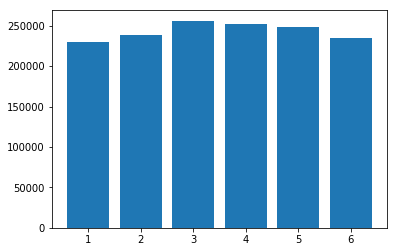

[(4, 251645), (1, 229707), (5, 248487), (6, 234316), (2, 238300), (3, 256189)]


In [79]:
pickup_datetime = df.select(['pickup_datetime'])
temp = pickup_datetime.rdd.map(lambda x: x['pickup_datetime']).map(lambda x: int(x.split(' ')[0].split('-')[1])).map(lambda x: (x, 1))
list = temp.reduceByKey(lambda x, y: x + y).collect()
month = []
count_by_month = []
for x in list:
    month.append(x[0])
    count_by_month.append(x[1])


fig, ax = plt.subplots()
ax.bar(month, count_by_month)
plt.show()
# temp[0]['pickup_datetime']
# for x in temp:
#     print(x)

# df.withColumn('month', df. + 2)[].collect()
print(list)

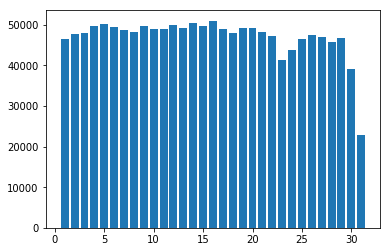

[(12, 50080), (16, 51027), (28, 45891), (20, 49198), (24, 43876), (4, 49655), (8, 48248), (17, 48968), (21, 48306), (1, 46612), (5, 50176), (9, 49634), (25, 46450), (13, 49293), (29, 46807), (14, 50488), (6, 49476), (26, 47595), (30, 39135), (10, 48867), (18, 47925), (2, 47752), (22, 47254), (19, 49265), (27, 46957), (15, 49791), (11, 48864), (3, 47945), (23, 41450), (7, 48671), (31, 22988)]


In [80]:
pickup_datetime = df.select(['pickup_datetime'])
temp = pickup_datetime.rdd.map(lambda x: x['pickup_datetime']).map(lambda x: int(x.split(' ')[0].split('-')[2])).map(lambda x: (x, 1))
list = temp.reduceByKey(lambda x, y: x + y).collect()
month = []
count_by_month = []
for x in list:
    month.append(x[0])
    count_by_month.append(x[1])


fig, ax = plt.subplots()
ax.bar(month, count_by_month)
plt.show()
# temp[0]['pickup_datetime']
# for x in temp:
#     print(x)

# df.withColumn('month', df. + 2)[].collect()
print(list)

In [19]:
# 我们也可以把DataFrame对象转化为一个虚拟的表，然后用SQL语句查询
df.registerTempTable('data')
pickup_datetime = sqlContext.sql('select id, pickup_datetime from data limit 10')

In [85]:
df.count()

1458644

In [86]:
df.head(5)

[Row(id='id2875421', vendor_id='2', pickup_datetime='2016-03-14 17:24:55', dropoff_datetime='2016-03-14 17:32:30', passenger_count='1', pickup_longitude='-73.982154846191406', pickup_latitude='40.767936706542969', dropoff_longitude='-73.964630126953125', dropoff_latitude='40.765602111816406', store_and_fwd_flag='N', trip_duration='455'),
 Row(id='id2377394', vendor_id='1', pickup_datetime='2016-06-12 00:43:35', dropoff_datetime='2016-06-12 00:54:38', passenger_count='1', pickup_longitude='-73.980415344238281', pickup_latitude='40.738563537597656', dropoff_longitude='-73.999481201171875', dropoff_latitude='40.731151580810547', store_and_fwd_flag='N', trip_duration='663'),
 Row(id='id3858529', vendor_id='2', pickup_datetime='2016-01-19 11:35:24', dropoff_datetime='2016-01-19 12:10:48', passenger_count='1', pickup_longitude='-73.979026794433594', pickup_latitude='40.763938903808594', dropoff_longitude='-74.005332946777344', dropoff_latitude='40.710086822509766', store_and_fwd_flag='N', tr

In [91]:
df['trip_duration'].desc().show()

TypeError: 'Column' object is not callable